# Input

This visualization analyses the experiment where we compared each model, balancing method, number of classes and feature combinations. It counts the number of occurences of each feature combination in the top X scores and should give a general idea of which features are valuable to us.

In [1]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

In [2]:
# Generate the Dictionary containing all the dataframes

models = ['Decision_Tree', 'Logistic_Regression', 'MLP_Classifier', 'Random_Forest_Classifier']
methods = ['Cluster-based_Oversampling_SMOTE', 'No-balancing', 'Random-oversampling', 'SMOTE']

PATH = '/datc/nano/notebooks/Results/DataFrames/Mean error/'

# Init dict
df_dict = {}

for model in models:
    for method in methods:
        # Import Dataframe
        df = pd.read_csv(PATH + f'{model}-{method}.csv', index_col= ('score_type', 'features_used'))
        
        # Save Dataframe to dict
        if model in df_dict:
            df_dict[model][method] = df
        else:
            df_dict[model]={method: df}
            

In [3]:
# Extract highest scoring features for all models and methods

models = ['Decision_Tree', 'Logistic_Regression', 'MLP_Classifier', 'Random_Forest_Classifier']
methods = ['Cluster-based_Oversampling_SMOTE', 'No-balancing', 'Random-oversampling', 'SMOTE']
score = 'accuracy'
sortby = 'n_classes=3'

# Init list
highest_features = []

# Make complete list
for model in models:
    for method in methods:
        
        values = df_dict[model][method].loc[score].sort_values(sortby).tail(5).index.tolist()
        highest_features.append(values)

# Unnest list to be able to count the values
highest_features = list(chain.from_iterable(highest_features))

# Count values and create dict
highest_features_count = {i: highest_features.count(i) for i in highest_features}

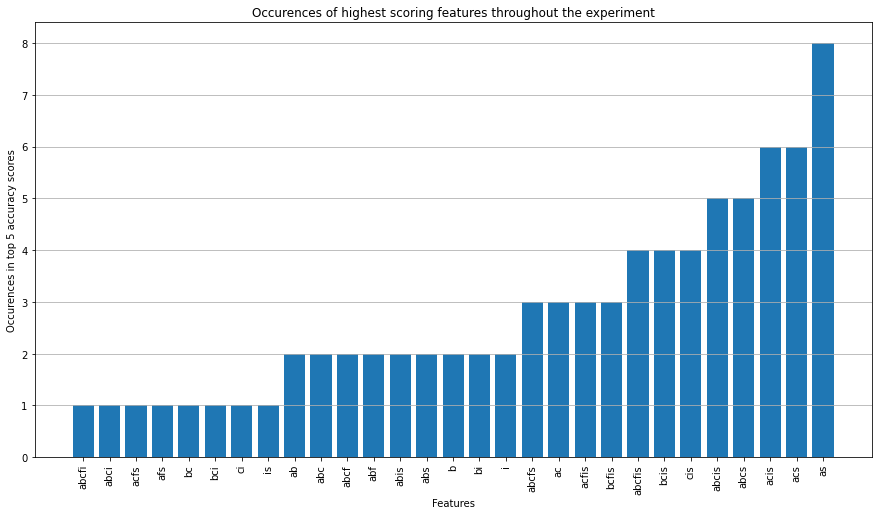

In [4]:
# Sort data
data_plot = [(y, x) for y, x in zip(highest_features_count.values(), highest_features_count.keys())]
data_plot.sort()
y, x = zip(*data_plot)

# Plot
plt.figure(figsize=(15,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.grid(True, axis= 'y')
plt.title('Occurences of highest scoring features throughout the experiment')
plt.xlabel('Features')
plt.ylabel('Occurences in top 5 '+score+' scores')
plt.show()

# Evaluation

For 3 classes (f1 score), as is 11/16 times in Top 5, 10/16 times in top 2, and 6/16 times selected as the best feature combination. This is drastically different for 2, 4 or 5 classes

# Output

This visualization gave a good first indication of which features are generally important and helped us move on to a more complicated, ranked visualization of feature combinations (made by Oscar).